In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm as glm_sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('../data/field_goals.csv', index_col=0)
df['intercept'] = 1
df.head()

,good,dist,year,seasons,cold,altitude,humid,windy,away_game,postseason,iced,turf,precipitation,pressure,intercept
pid,,,,,,,,,,,,,,,
829284,1,38,2019,2,0,0,1,1,0,0,0,0,0,0,1
829704,1,34,2019,8,0,0,0,1,1,0,0,0,0,0,1
829916,1,28,2019,3,0,0,0,1,1,0,0,0,0,0,1
829945,1,37,2019,5,0,0,0,1,0,0,0,0,0,0,1
829954,1,25,2019,3,0,0,0,1,1,0,0,0,0,0,1


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['good','postseason','precipitation','year','cold'], axis=1), df['good'], test_size=0.2, stratify=df['good'])

In [6]:
print('Full rank?', np.linalg.matrix_rank(x_train)==len(x_train.columns))

Full rank? True


In [97]:
# Using the Logit class
model = sm.Logit(y_train, x_train)
result = model.fit(method='bfgs')
print(result.summary())

         Current function value: 0.336076
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:                   good   No. Observations:                   75
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            9
Date:                Fri, 07 Feb 2020   Pseudo R-squ.:                  0.2712
Time:                        15:14:21   Log-Likelihood:                -25.206
converged:                      False   LL-Null:                       -34.585
Covariance Type:            nonrobust   LLR p-value:                   0.02733
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dist          -0.1130      0.047     -2.386      0.017      -0.206      -0.0

In [7]:
# Using the glm API (Intercept added automatically)
model = glm_sm('good ~ '+'+'.join(x_train.drop('intercept', axis=1).columns.values), x_train.join(y_train), family=sm.families.Binomial())
result = model.fit()
print(result.summary())

Generalized Linear Model Regression Results                  
Dep. Variable:                   good   No. Observations:                   75
Model:                            GLM   Df Residuals:                       65
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.578
Date:                Mon, 10 Feb 2020   Deviance:                       47.155
Time:                        13:29:17   Pearson chi2:                     50.5
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0658      2.418      2.922      0.003       2.326   

In [8]:
y_pred = result.predict(exog=x_test)
y_logits = -np.log((1/y_pred) -1)

In [9]:
loss = log_loss(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(loss,auc)

0.41101083186180754 0.8333333333333334


In [10]:
df_results = x_test.copy()
df_results['good'] = y_test
df_results['prob'] = y_pred
df_results['logits'] = y_logits
df_results

,dist,seasons,altitude,humid,windy,away_game,iced,turf,pressure,intercept,good,prob,logits
pid,,,,,,,,,,,,,
832866,32,5,0,0,0,1,0,1,0,1,1,0.720008,0.944502
832110,22,3,0,1,1,1,0,0,0,1,1,0.985189,4.197469
829945,37,5,0,0,1,0,0,0,0,1,1,0.978399,3.813195
831673,56,4,0,0,0,0,0,1,0,1,0,0.396825,-0.418711
832951,40,14,0,0,0,0,0,1,0,1,0,0.580193,0.323564
831961,37,1,0,0,1,0,0,0,0,1,1,0.986483,4.290219
834175,42,4,0,0,1,1,0,0,0,1,1,0.870798,1.908031
830551,22,3,0,0,1,0,0,1,0,1,1,0.996424,5.630021
830925,55,14,0,0,0,1,0,0,0,1,1,0.064493,-2.674534


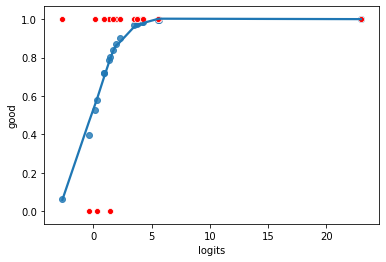

In [14]:
ax = sns.regplot(x='logits', y='prob', data=df_results, lowess=True)
sns.scatterplot(x='logits', y='good', data=df_results, ax=ax, color='r')

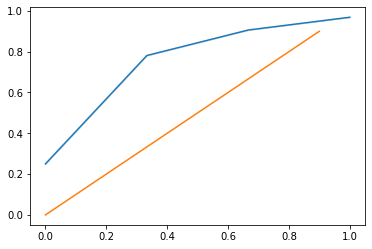

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ax = sns.lineplot(x=fpr, y=tpr, ci=0, markers=True)
sns.lineplot(x=np.arange(0,1,0.1), y=np.arange(0,1,0.1), dashes=True, ax=ax)